 # <u>  Predicting Loan Repayment Probabilities for Mobile Microcredit </u>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\windows 10\Downloads\Micro-credit-Data-file.csv")

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


In [5]:
df.shape

(209593, 37)

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


# Data Cleaning and analysis

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [12]:
df= df.set_index('Unnamed: 0')

In [13]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [14]:
features = ['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate']

In [15]:
df.isnull().sum().sum()

0

In [16]:
df['label'].unique()

array([0, 1], dtype=int64)

# Data Encoding

In [17]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [18]:
grouped = df.groupby('label')
for name,group in grouped:
    print(name)
    print(group)

0
            label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
Unnamed: 0                                                                     
1               0  21408I70789   272.0   3055.050000   3065.150000    220.13   
12              0  82417I90848    82.0     65.166667     65.166667    326.20   
16              0  24075I89239  1037.0     12.000000     12.000000   1216.80   
17              0  82053I85350  1583.0   1000.000000   1000.000000   1000.80   
22              0  75522I70784   378.0    514.693333    515.200000     56.26   
...           ...          ...     ...           ...           ...       ...   
209548          0  32172I88688   153.0   5670.733333   5672.200000   1817.08   
209550          0  59552I90843   843.0    729.235000    758.470000   7470.90   
209555          0  49076I89233   744.0   1454.491667   1461.750000    559.73   
209572          0  59768I84453   827.0   1867.668667   1881.180000   1875.72   
209585          0  70387I89237   945.0

In [19]:
from sklearn.preprocessing import LabelEncoder
lab_enc  = LabelEncoder()

In [20]:
df['pcircle']=lab_enc.fit_transform(df['pcircle'])
df['msisdn']=lab_enc.fit_transform(df['msisdn'])
    

In [21]:
df.shape

(209593, 36)

# Exploratory data Analysis(EDA)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [24]:
df.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [25]:
df.corr

<bound method DataFrame.corr of             label  msisdn     aon  daily_decr30  daily_decr90  rental30  \
Unnamed: 0                                                                
1               0   40191   272.0   3055.050000   3065.150000    220.13   
2               1  142291   712.0  12122.000000  12124.750000   3691.26   
3               1   33594   535.0   1398.000000   1398.000000    900.13   
4               1  104157   241.0     21.228000     21.228000    159.42   
5               1    6910   947.0    150.619333    150.619333   1098.90   
...           ...     ...     ...           ...           ...       ...   
209589          1   42866   404.0    151.872333    151.872333   1089.19   
209590          1  178248  1075.0     36.936000     36.936000   1728.36   
209591          1   53995  1013.0  11843.111670  11904.350000   5861.83   
209592          1  111388  1732.0  12488.228330  12574.370000    411.83   
209593          1  121263  1581.0   4489.362000   4534.820000    483

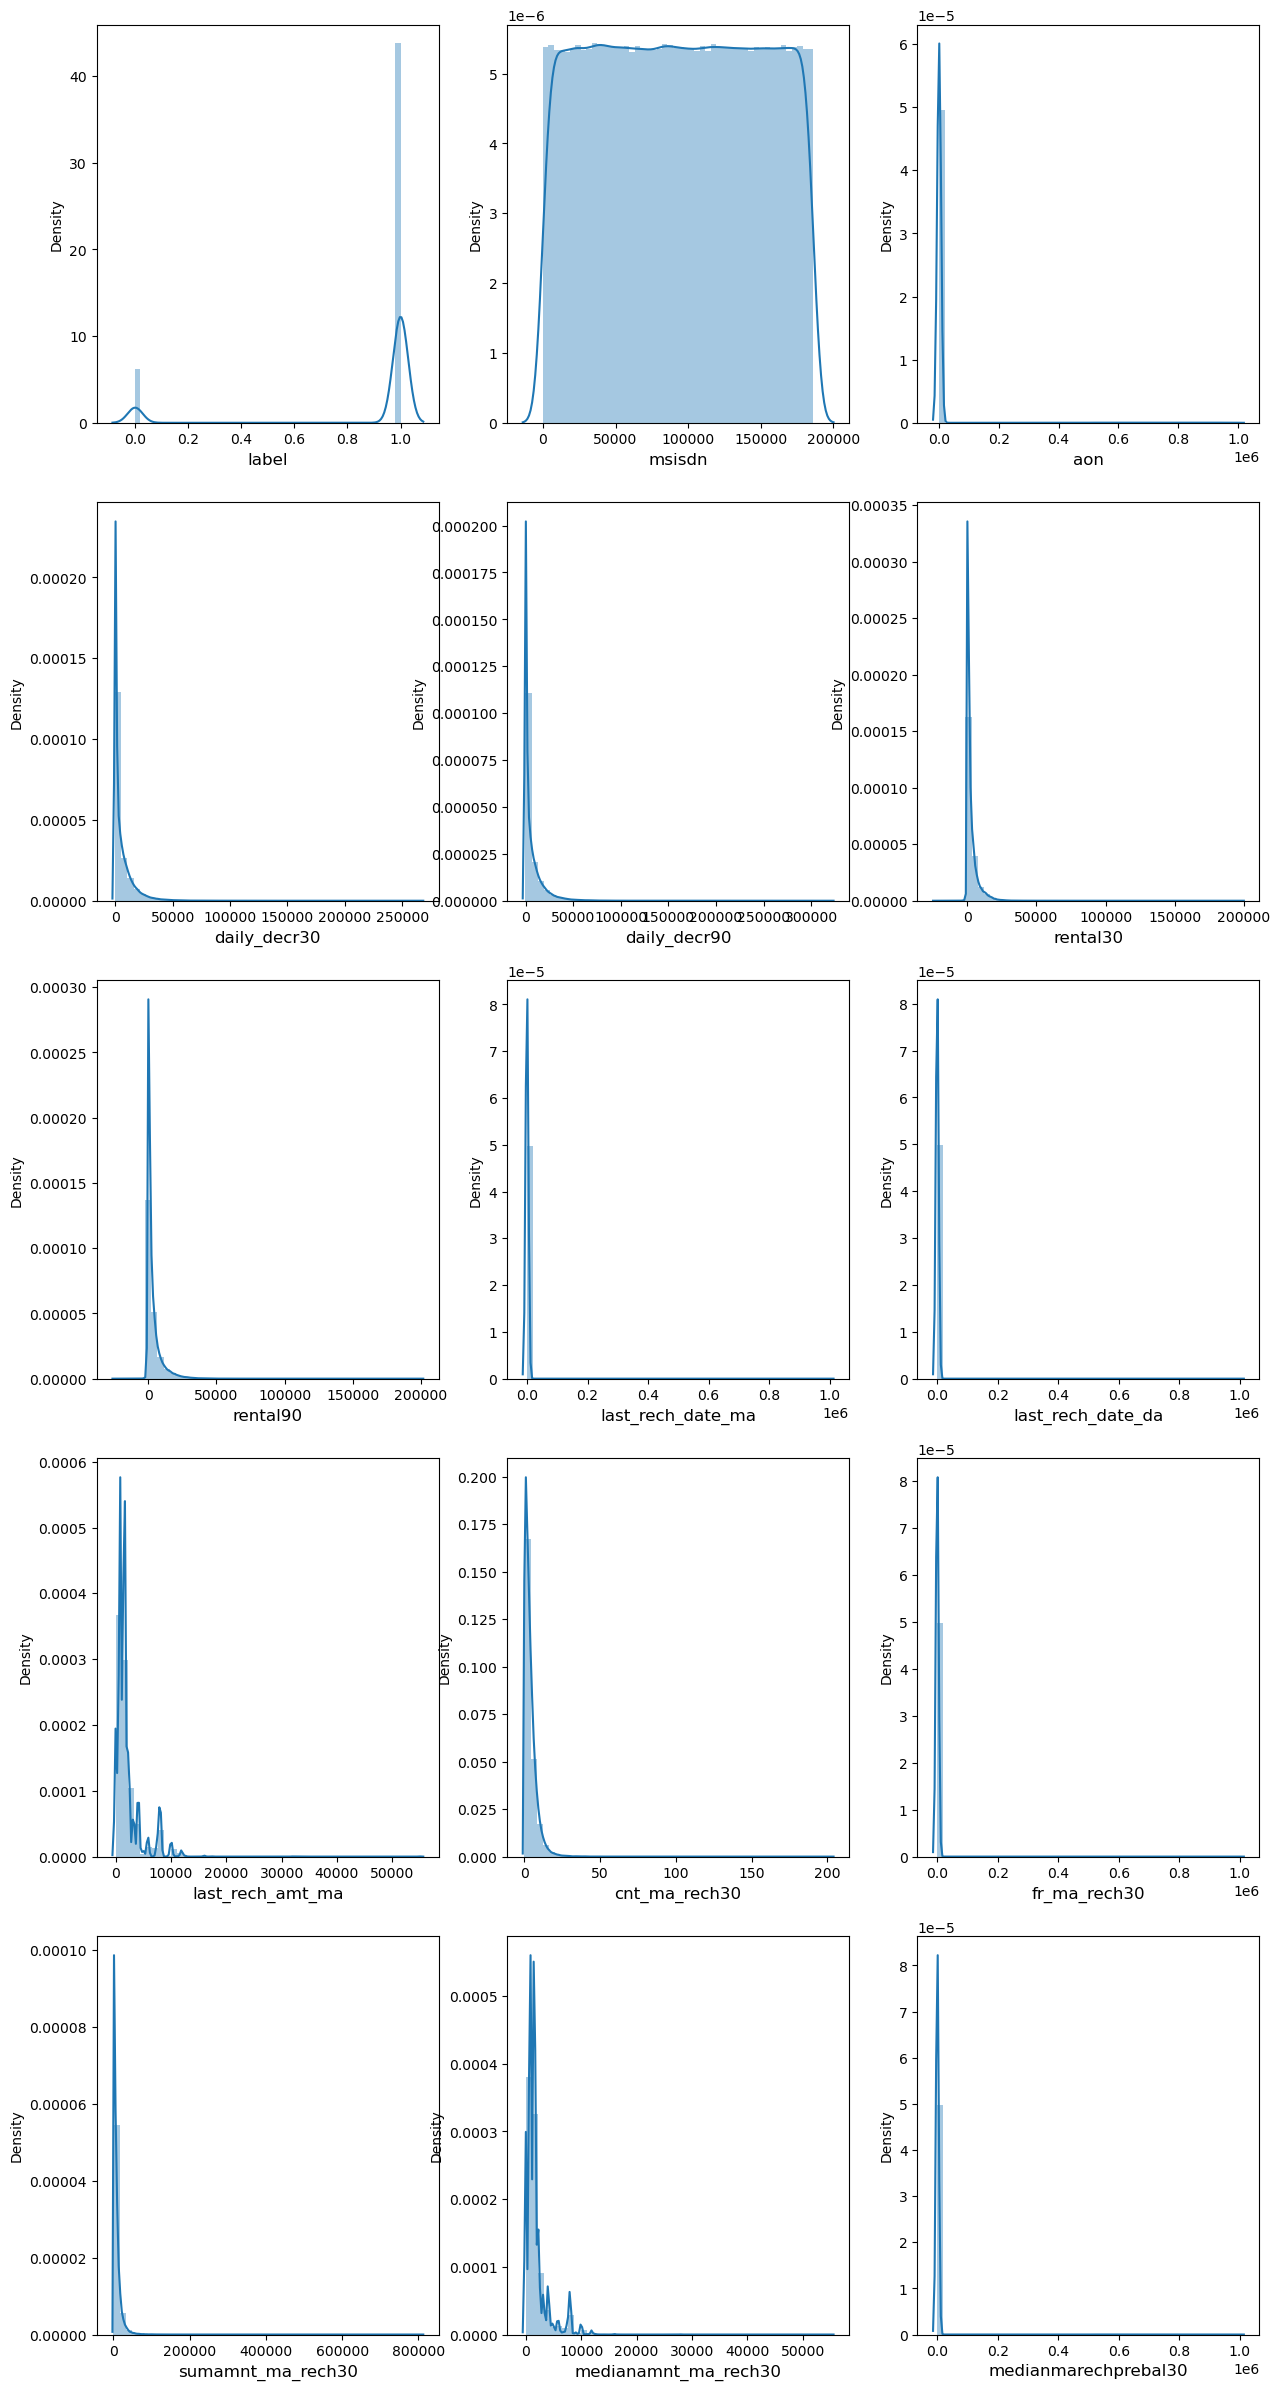

In [26]:
plt.figure(figsize=(15,30))
plotnumber = 1
for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
    
plt.show()

<Axes: >

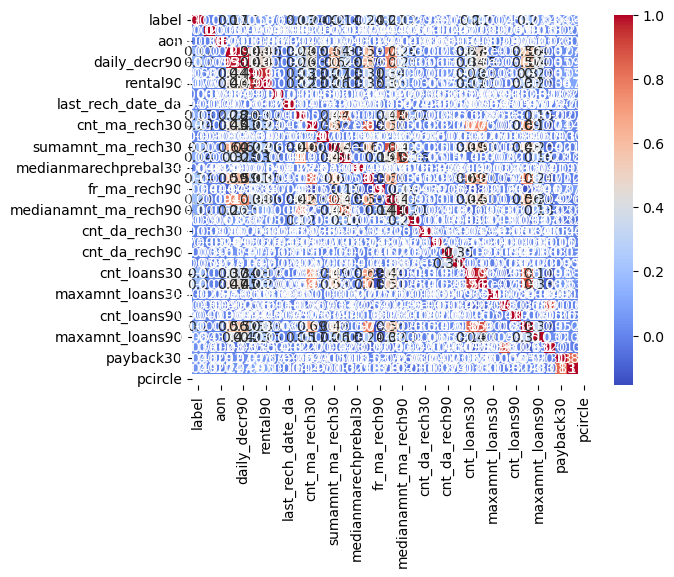

In [27]:
numeric_only=True
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [28]:

data = df.drop(columns = ['pdate'],axis = 1)

In [29]:
abs(data.corr()['label']).sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
fr_da_rech90            0.005418
medianmarechprebal30    0.004829
cnt_loans90             0.004733
cnt_da_rech30           0.003827
aon                     0.003785
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
msisdn                  0.001976
last_rech_

<Axes: title={'center': 'Correlation with label'}>

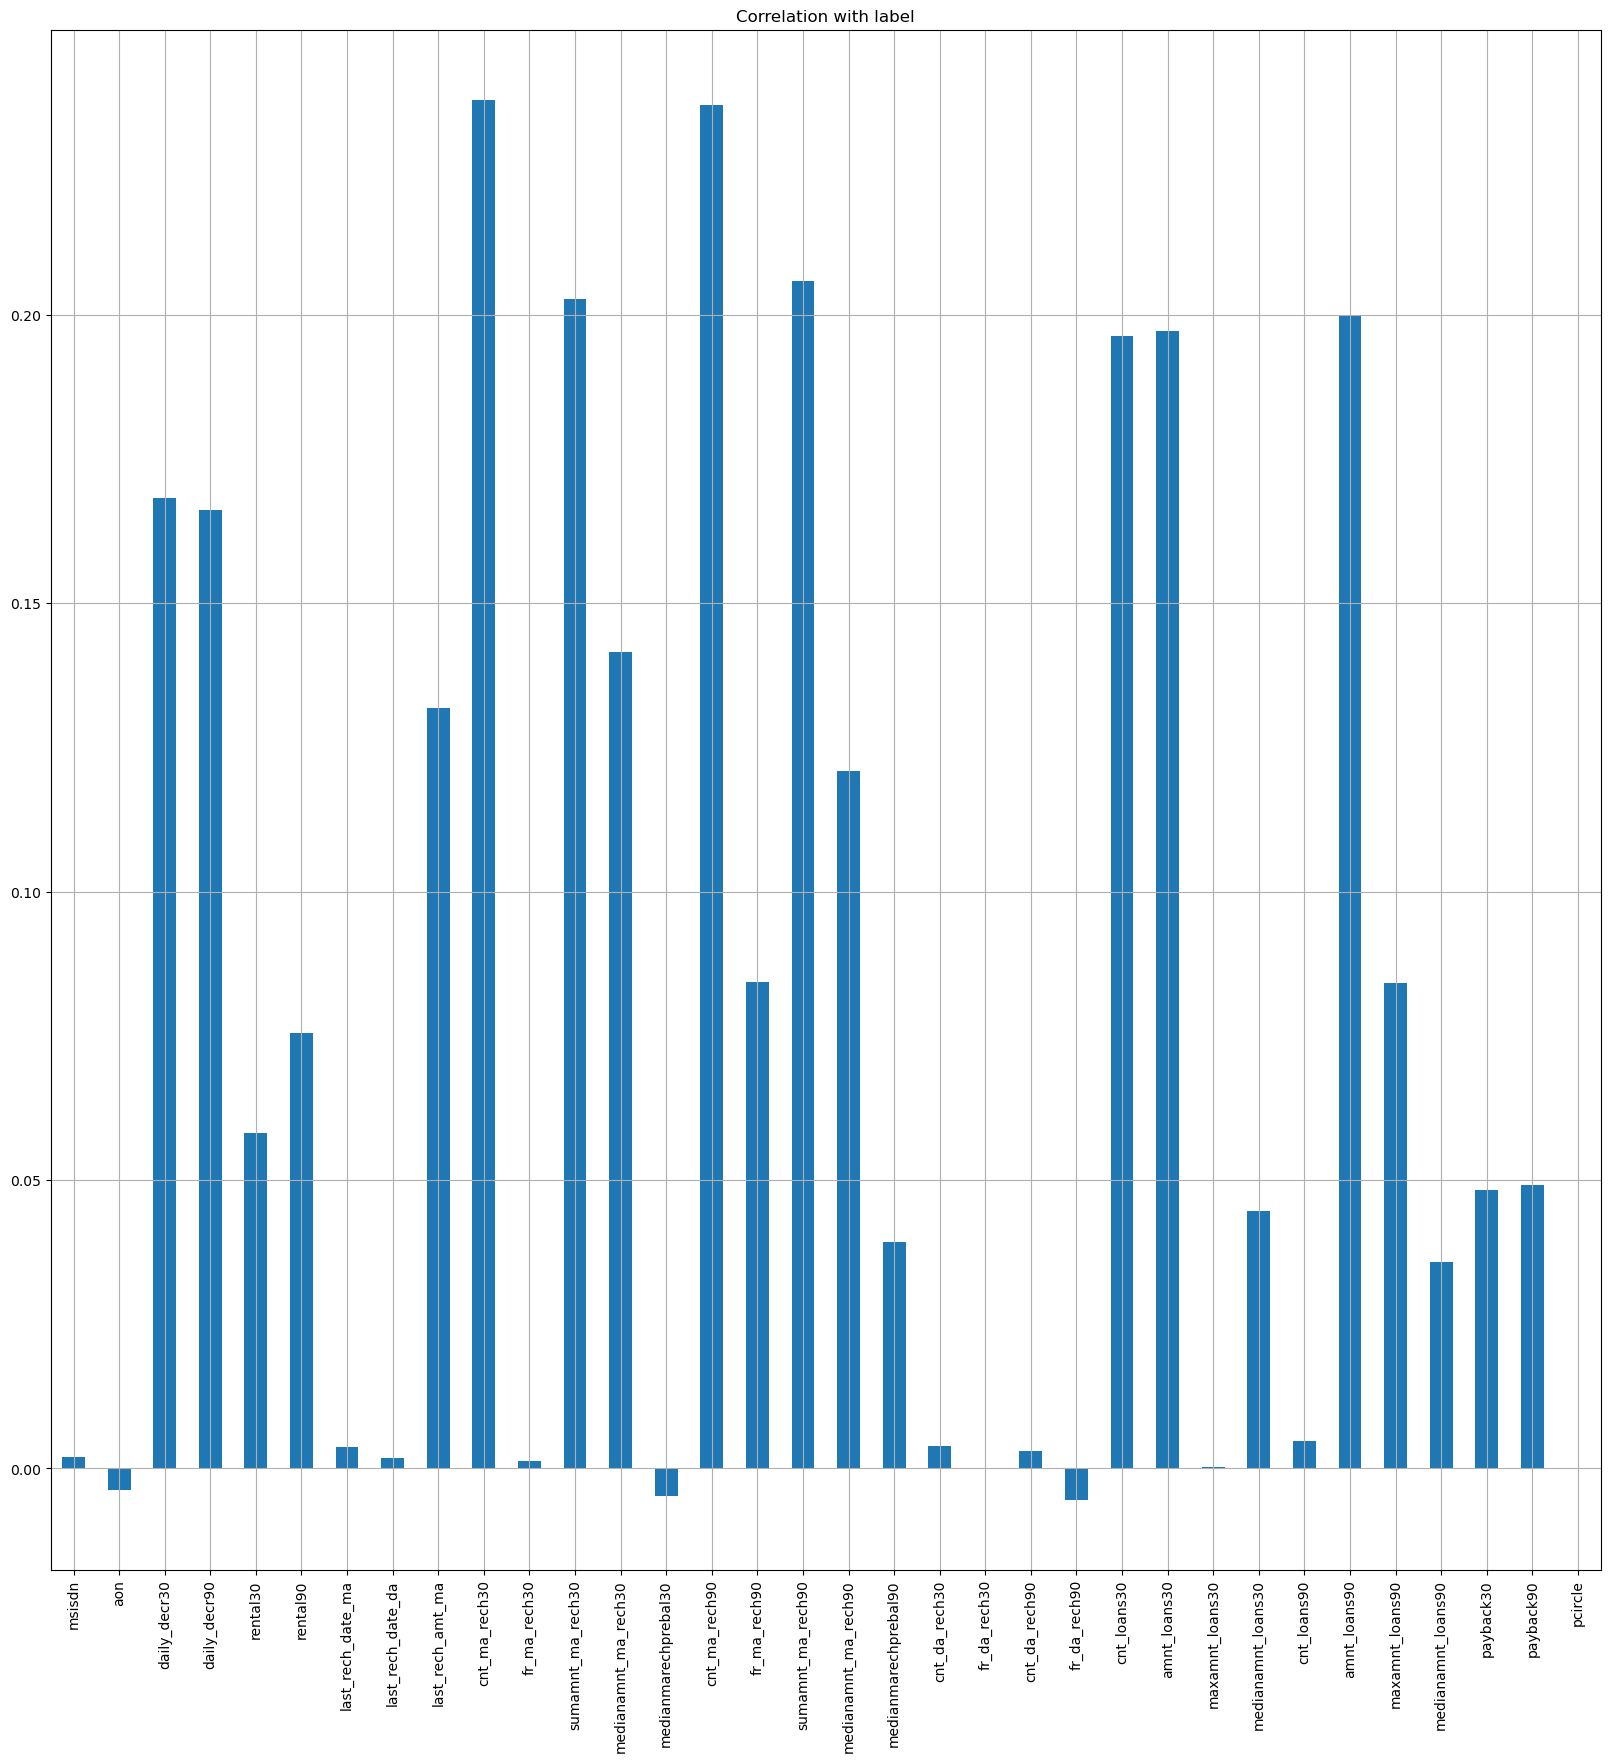

In [63]:
data.drop('label', axis=1).corrwith(data['label']).plot(kind='bar', grid=True, figsize=(20, 20), title="Correlation with label ")

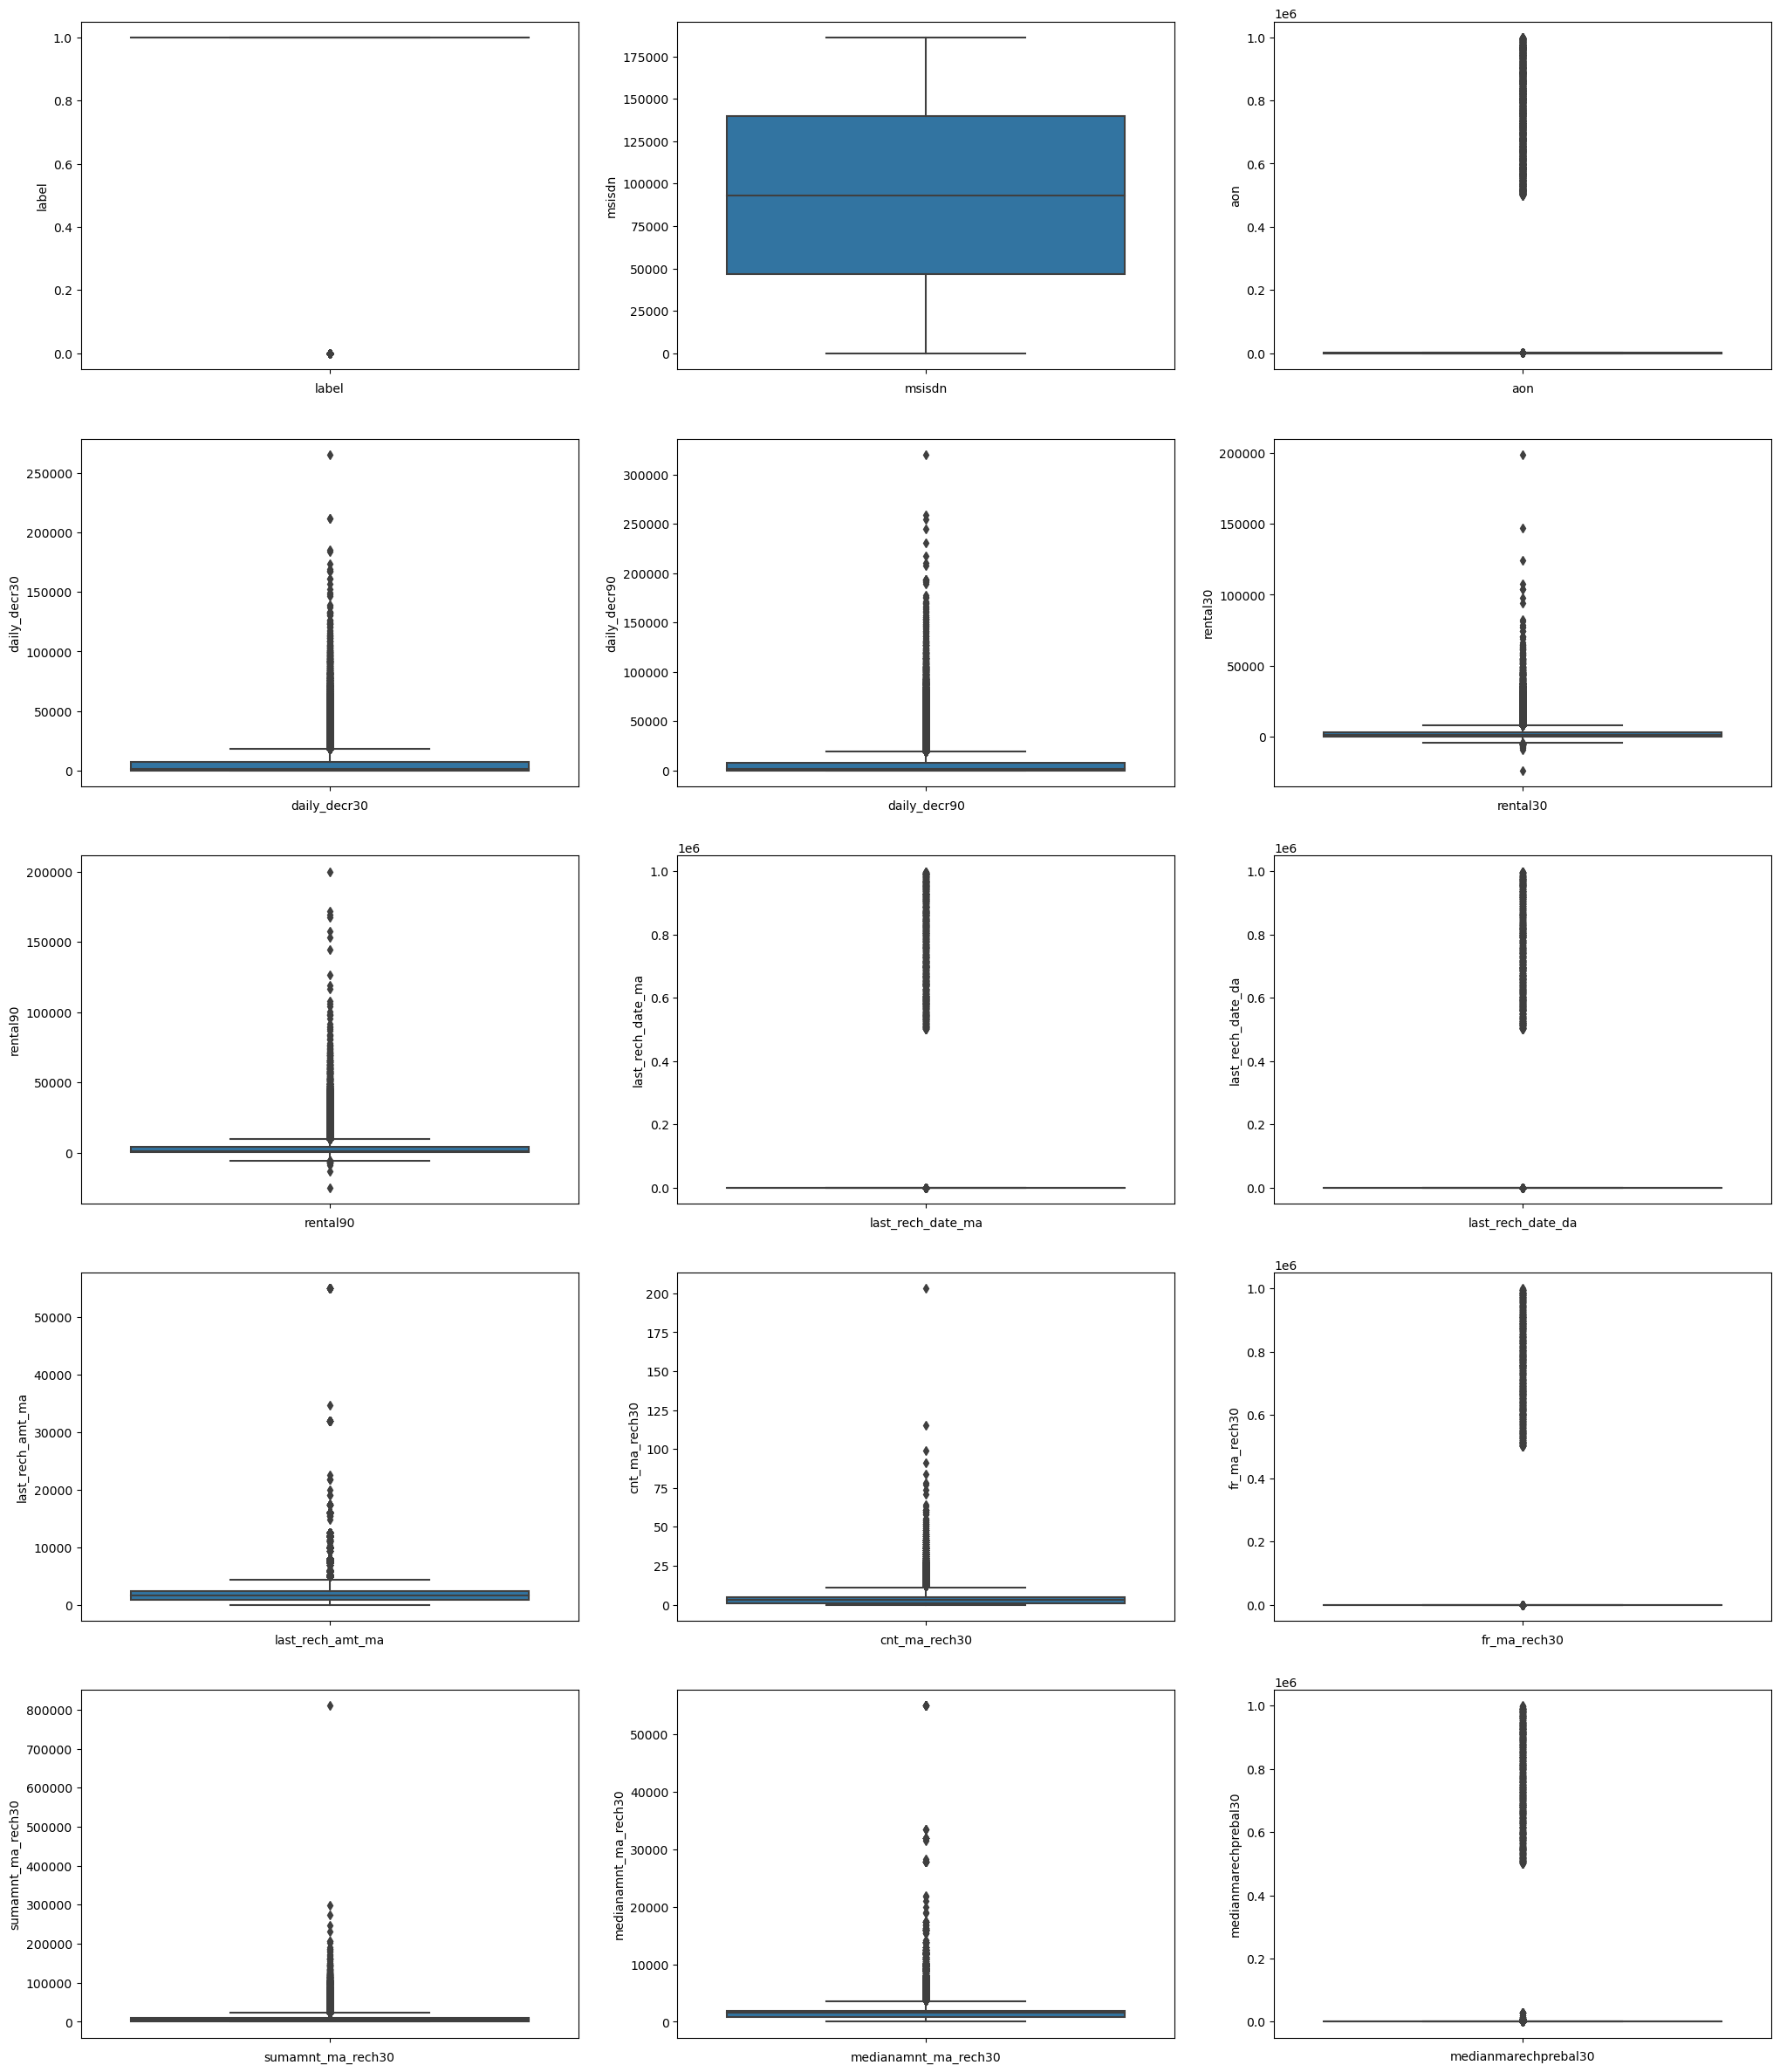

In [31]:
plt.figure(figsize=(25,30))
graph = 1

for column in data:
    if graph<=15:
        ax = plt.subplot(5,3,graph)
        sns.boxplot(y=df[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

# Heatmap

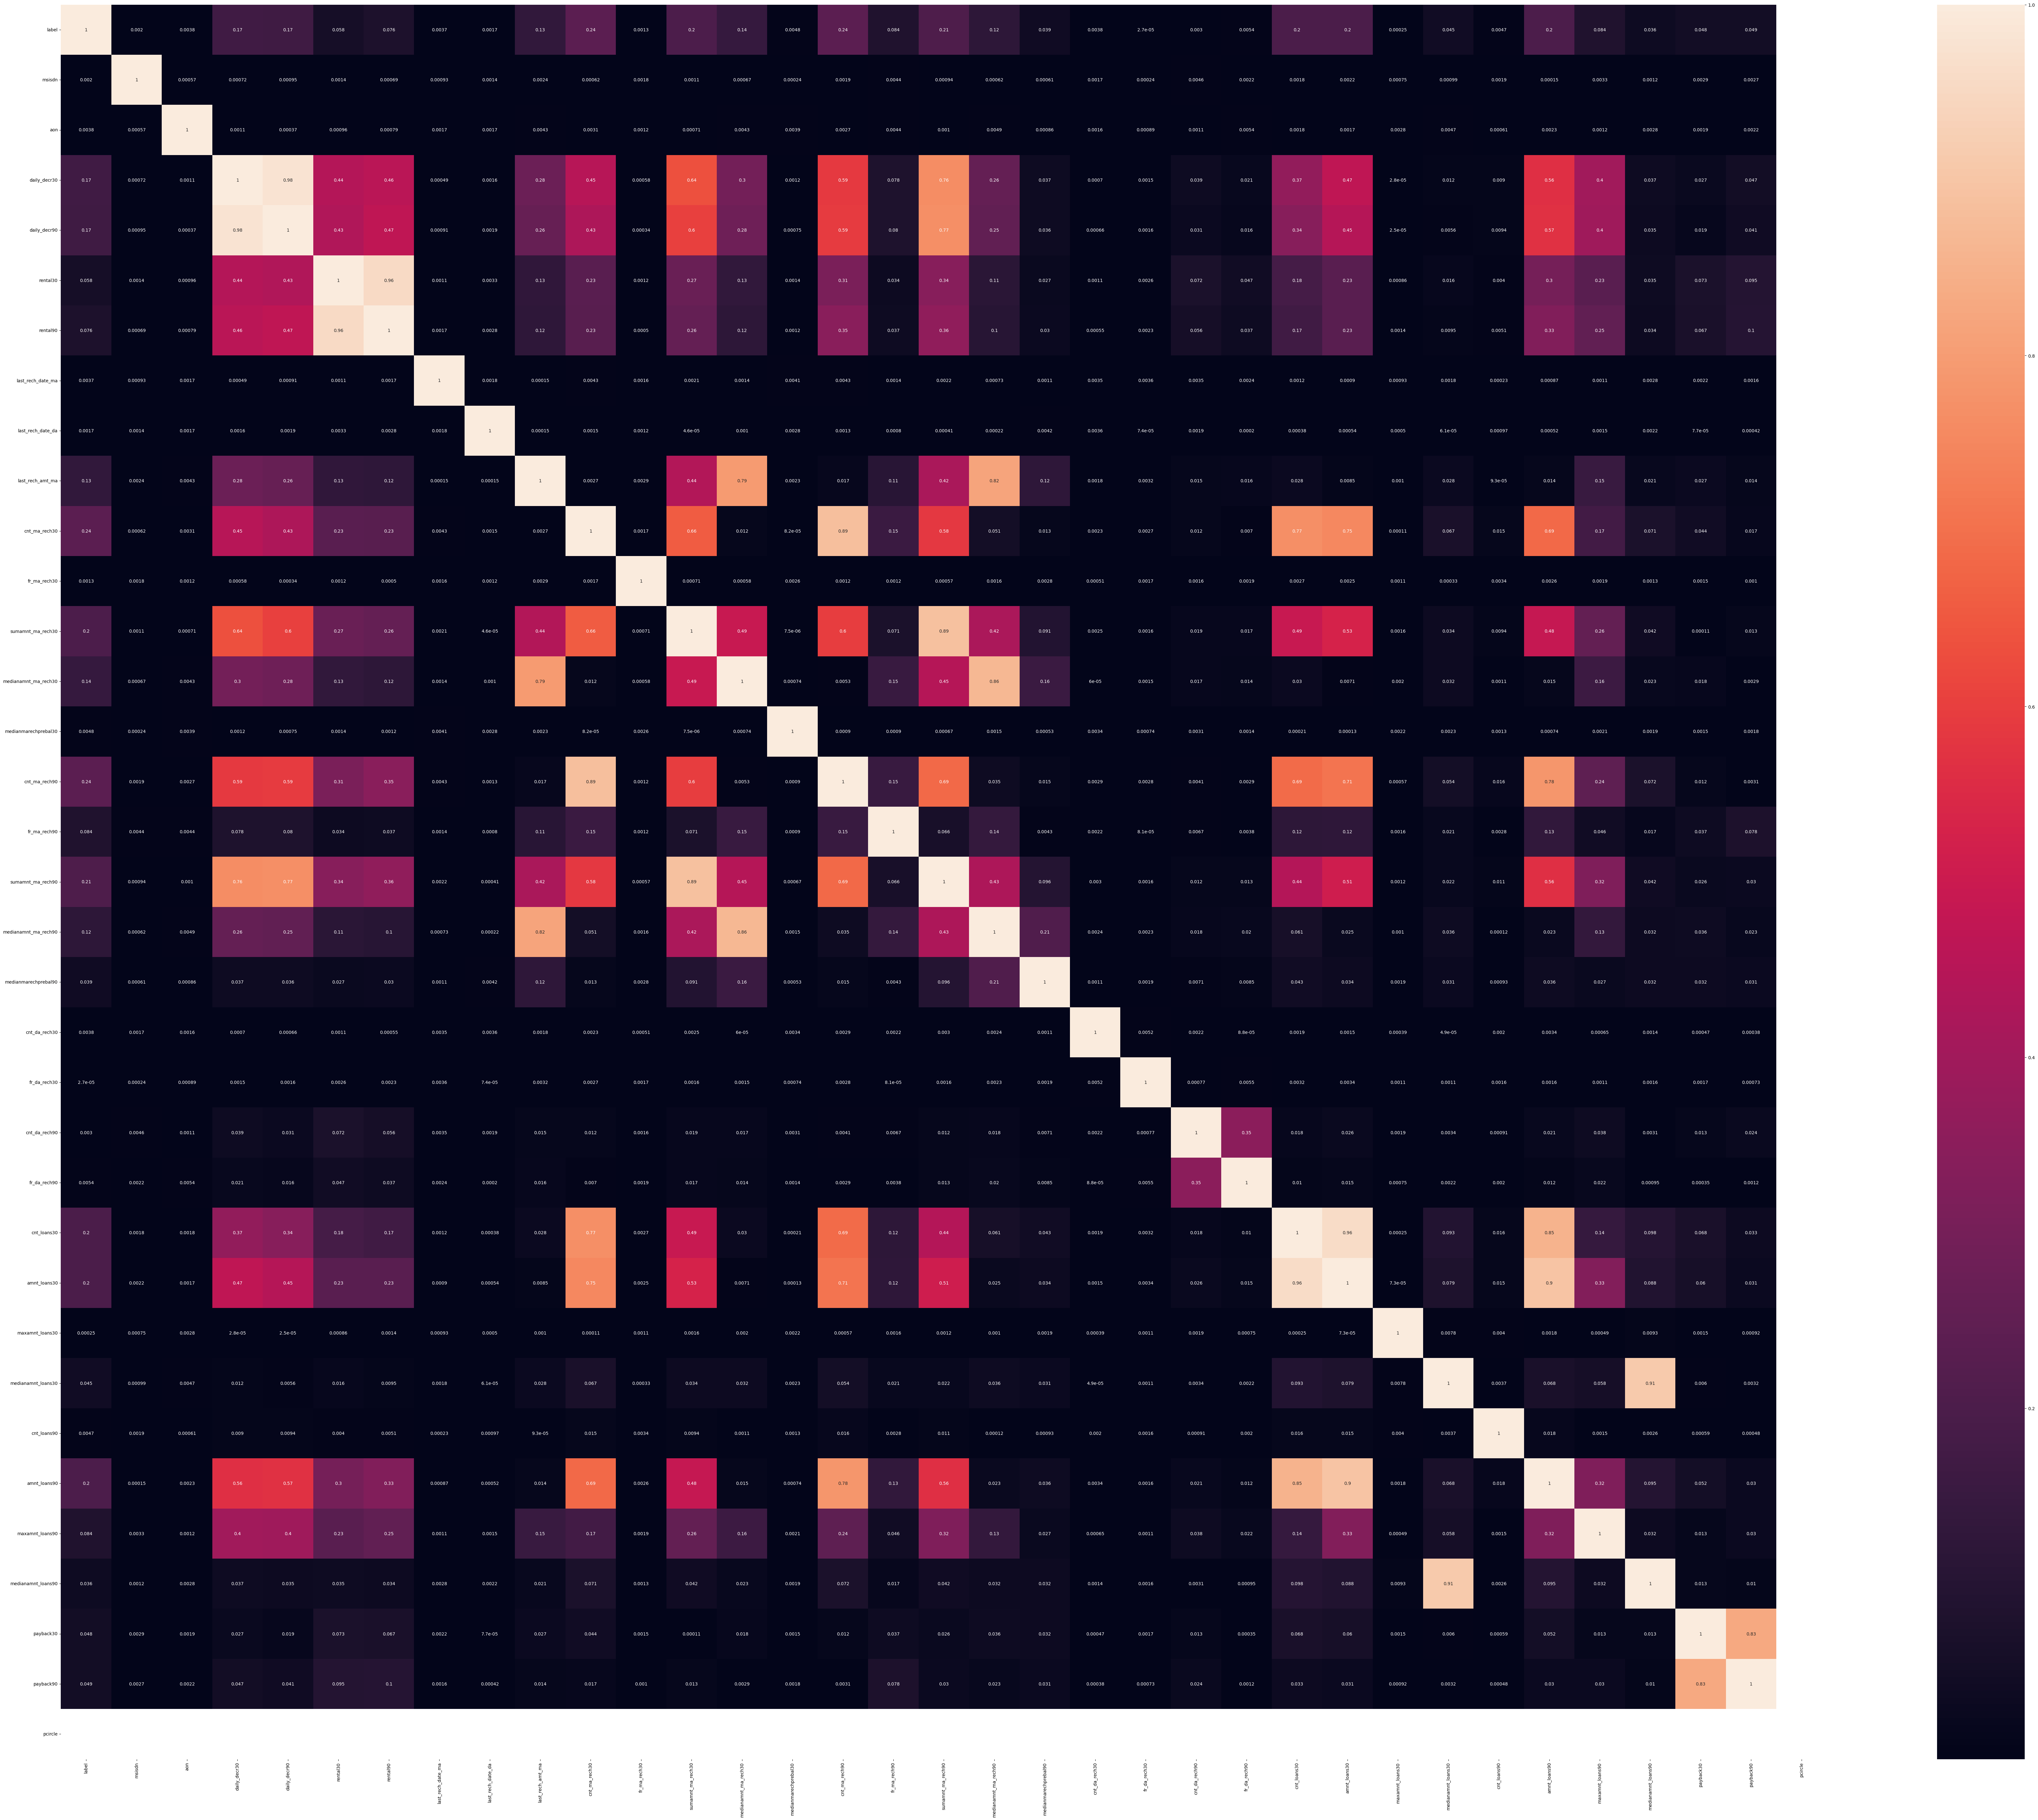

In [32]:
plt.figure(figsize = (90,72))
sns.heatmap(abs(data.corr()),annot=True)
plt.show()

## Datastandisation and vif values check for multicolinearity

In [33]:
X = data.drop(columns = ['label'],axis = 1)
Y = data['label']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X = pd.DataFrame(X_scaler,columns = X.columns)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['features']  = X.columns
vif

,vif,features
0,1.000192,msisdn
1,1.000181,aon
2,29.102446,daily_decr30
3,31.997121,daily_decr90
4,13.138360,rental30
5,13.806055,rental90
6,1.000148,last_rech_date_ma
7,1.000130,last_rech_date_da
8,3.431650,last_rech_amt_ma
9,14.989052,cnt_ma_rech30


# PCA

In [36]:
from sklearn.decomposition import PCA
for i in range(2,19):
    pca = PCA(n_components = i)
    principalComponents = pca.fit_transform(X)
    print(i,sum(pca.explained_variance_ratio_))

2 0.30497503318565167
3 0.364173656716664
4 0.4214335607231231
5 0.47185001926024306
6 0.5123656159246903
7 0.5430651876061989
8 0.5736095038214826
9 0.6040540394549794
10 0.6344640218282465
11 0.6648459867355924
12 0.6951688515675406
13 0.725407936236214
14 0.7555409488983473
15 0.7856498252116606
16 0.8157280391523778
17 0.8456674735938796
18 0.8754766215166175


In [37]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X)
X = pd.DataFrame(principalComponents)

In [38]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.424292,-0.193752,2.553215,-1.536972,-2.484633,-0.063717,0.146573,-0.100832,-0.560056,-0.211342,-0.119207,-0.442457,0.454982
1,0.460454,3.195472,-0.257212,-0.423977,0.622101,-0.169488,0.395615,0.323886,1.408445,0.492518,-0.190369,-0.156335,0.297620
2,-1.973573,0.110232,-0.532941,-0.214875,0.481222,-0.114292,0.157158,-0.078440,-0.451599,-0.180162,-0.029960,-0.483803,0.564495
3,-2.121581,-0.748444,-0.582609,-0.095949,0.388758,-0.057499,0.155558,0.051346,0.477583,0.101732,-0.045337,-0.156402,0.122591
4,1.533290,-0.699821,-1.401477,-0.065865,-1.327303,0.288598,-0.111908,-0.354493,-1.345343,-0.528237,0.071072,-0.472187,0.210575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.771624,1.144344,-0.930092,-0.362628,-0.340713,0.041401,0.026655,-0.170537,-0.556249,-0.249759,0.030733,-0.378577,0.281120
209589,-1.029824,-1.050902,-0.537817,-0.071773,0.175747,-0.013576,-0.029140,0.041925,1.194373,0.210558,0.090780,0.315100,-0.650879
209590,2.434294,-0.779572,0.560284,-0.022046,0.813491,-0.245054,0.246250,0.026139,-0.157572,-0.045135,-0.143599,-0.454256,0.502642
209591,0.841475,-0.054536,0.234504,-0.079521,0.357757,1.554250,0.531789,0.388878,1.263476,0.422024,-0.238427,-0.374488,0.760875


# Model Training 

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [40]:
for i in range(500,700):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    LR.fit(X_train,Y_train)
    pred_train = LR.predict(X_train)
    pred_test = LR.predict(X_test)
    if round(accuracy_score(Y_train,pred_train)*100,1) == round(accuracy_score(Y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well!")
        print("At random state",i)
        print("Trainig accuracy is:",accuracy_score(Y_train,pred_train)*100)
        print("Testing accuracy is:",accuracy_score(Y_test,pred_test)*100)

At random state 501 model perform very well!
At random state 501
Trainig accuracy is: 87.48523921418943
Testing accuracy is: 87.45914740332546
At random state 502 model perform very well!
At random state 502
Trainig accuracy is: 87.48106444648545
Testing accuracy is: 87.49015959350174
At random state 506 model perform very well!
At random state 506
Trainig accuracy is: 87.49299235421115
Testing accuracy is: 87.4686896156874
At random state 508 model perform very well!
At random state 508
Trainig accuracy is: 87.4828536326443
Testing accuracy is: 87.45914740332546
At random state 514 model perform very well!
At random state 514
Trainig accuracy is: 87.46973293414601
Testing accuracy is: 87.53309954913047
At random state 516 model perform very well!
At random state 516
Trainig accuracy is: 87.48464281880315
Testing accuracy is: 87.4830029342303
At random state 518 model perform very well!
At random state 518
Trainig accuracy is: 87.47211851569116
Testing accuracy is: 87.54025620840193
At

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state=696)

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [43]:
print("trainig outcome",Y_train.value_counts())

trainig outcome label
1    146737
0     20937
Name: count, dtype: int64


In [44]:
Counter(Y_train)

Counter({1: 146737, 0: 20937})

In [45]:
20937/167674

0.12486730202655152

In [46]:
from imblearn.over_sampling import SMOTE

ove_smp = SMOTE(sampling_strategy=0.80)
X_train_ns, Y_train_ns = ove_smp.fit_resample(X_train, Y_train)

print("The no of classes before fit", format(Counter(Y_train)))
print("The no of classes after fit", format(Counter(Y_train_ns)))

The no of classes before fit Counter({1: 146737, 0: 20937})
The no of classes after fit Counter({1: 146737, 0: 117389})


# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_ns,Y_train_ns)
pred = lr.predict(X_test)
print(accuracy_score(Y_test,pred)*100)
print(classification_report(Y_test,pred))
print("Confusion matrix\n",confusion_matrix(Y_test,pred))

72.80946587466303
              precision    recall  f1-score   support

           0       0.28      0.77      0.41      5225
           1       0.96      0.72      0.82     36694

    accuracy                           0.73     41919
   macro avg       0.62      0.75      0.62     41919
weighted avg       0.87      0.73      0.77     41919

Confusion matrix
 [[ 4018  1207]
 [10191 26503]]


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_ns,Y_train_ns)
pred_dt = dt.predict(X_test)
print(accuracy_score(Y_test,pred_dt))
print(classification_report(Y_test,pred_dt))
print("Confusion matrix\n",confusion_matrix(Y_test,pred_dt))

0.7888546959612586
              precision    recall  f1-score   support

           0       0.30      0.52      0.38      5225
           1       0.92      0.83      0.87     36694

    accuracy                           0.79     41919
   macro avg       0.61      0.67      0.63     41919
weighted avg       0.85      0.79      0.81     41919

Confusion matrix
 [[ 2718  2507]
 [ 6344 30350]]


# Ensemble Technique
# Random Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_ns,Y_train_ns)
pred_rf = rf.predict(X_test)
print(accuracy_score(Y_test,pred_rf)*100)
print(classification_report(Y_test,pred_rf))
print("Confusion matrix \n",confusion_matrix(Y_test,pred_rf))

85.5554760371192
              precision    recall  f1-score   support

           0       0.44      0.54      0.48      5225
           1       0.93      0.90      0.92     36694

    accuracy                           0.86     41919
   macro avg       0.68      0.72      0.70     41919
weighted avg       0.87      0.86      0.86     41919

Confusion matrix 
 [[ 2833  2392]
 [ 3663 33031]]


# Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_ns,Y_train_ns)
pred_gb = gb.predict(X_test)
print(accuracy_score(Y_test,pred_gb)*100)
print(classification_report(Y_test,pred_gb))
print("Confusion matrix \n",confusion_matrix(Y_test,pred_gb))

80.38359693694983
              precision    recall  f1-score   support

           0       0.36      0.71      0.48      5311
           1       0.95      0.82      0.88     36608

    accuracy                           0.80     41919
   macro avg       0.66      0.76      0.68     41919
weighted avg       0.88      0.80      0.83     41919

Confusion matrix 
 [[ 3781  1530]
 [ 6693 29915]]


# Xtreme Boosting

In [51]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(X_train_ns,Y_train_ns)
pred_xgbt = xgbt.predict(X_test)
print(accuracy_score(Y_test,pred_xgbt)*100)
print(classification_report(Y_test,pred_xgbt))
print("Confusion matrix \n",confusion_matrix(Y_test,pred_xgbt))

80.30964479114483
              precision    recall  f1-score   support

           0       0.36      0.72      0.48      5225
           1       0.95      0.82      0.88     36694

    accuracy                           0.80     41919
   macro avg       0.65      0.77      0.68     41919
weighted avg       0.88      0.80      0.83     41919

Confusion matrix 
 [[ 3741  1484]
 [ 6770 29924]]


# Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
scr = cross_val_score(LR,X,Y,cv = 5)
print ("Cross validation score of logistic regression model is ",scr.mean()*100)

Cross validation score of logistic regression model is  87.47954378550212


In [54]:
scr = cross_val_score(dt,X,Y,cv = 5)
print ("Cross validation score of Decision Tree model is ",scr.mean()*100)


Cross validation score of Decision Tree model is  83.81530077544271


In [55]:
scr = cross_val_score(rf,X,Y,cv = 5)
print ("Cross validation score of Random Forest model is ",scr.mean()*100)

Cross validation score of Random Forest model is  88.92281806525916


In [57]:
scr = cross_val_score(gb,X,Y,cv = 5)
print ("Cross validation score of Graident Boosting model is ",scr.mean()*100)

Cross validation score of Graident Boosting model is  88.93283683052127


In [58]:
scr = cross_val_score(xgbt,X,Y,cv = 5)
print ("Cross validation score of xtreme boosting model is ",scr.mean()*100)

Cross validation score of xtreme boosting model is  88.89275976624111


# ROC-AUC

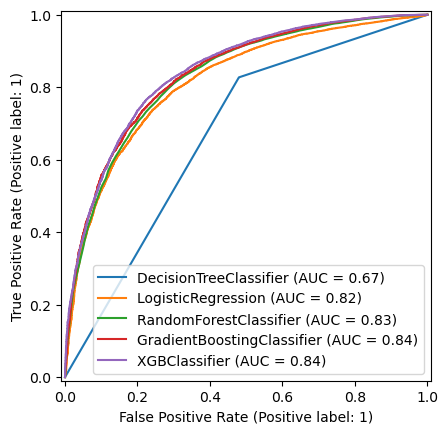

In [59]:
from sklearn.metrics import roc_curve, RocCurveDisplay
disp = RocCurveDisplay.from_estimator(dt, X_test, Y_test)
RocCurveDisplay.from_estimator(LR, X_test, Y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(rf, X_test, Y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(gb, X_test, Y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(xgbt, X_test, Y_test,ax = disp.ax_)


# Gridsearchcv for hypertuning the model - Xtreme boosting

In [60]:
from sklearn.model_selection import GridSearchCV
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 0)
params = {'learning_rate':np.arange(0.2,0.4,0.1),'n_estimators':range(10,12),'max_depth':range(6,12)}
GCV2 = GridSearchCV(xgbt,param_grid = params)
GCV2.fit(X_train,Y_train)
print("best_pram",GCV2.best_params_)
rf= GCV2.best_estimator_ # reinstalling with best params
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
rf_confusion_mat = confusion_matrix(Y_test,Y_pred)
print('\n Confusion matrix ==>\n',rf_confusion_mat)
print('\n accuracy score ==>\n',accuracy_score(Y_test,Y_pred))

best_pram {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 11}

 Confusion matrix ==>
 [[ 1264  4047]
 [  575 36033]]

 accuracy score ==>
 0.8897397361578282


In [61]:
import joblib
joblib.dump(GCV2.best_estimator_,'predict_loan_repayment.pkl')

['predict_loan_repayment.pkl']

In [66]:
model = joblib.load("predict_loan_repayment.pkl")
Y_preds = model.predict(X_test)
predicted = pd.DataFrame(Y_preds,columns = ['predicted'])
predicted

,predicted
0,1
1,1
2,1
3,1
4,1
...,...
41914,1
41915,1
41916,0
41917,0
